In [24]:
import scipy.signal
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
def read_chromatogram(path, pattern):
    data = pd.read_csv(path, header=None, sep='\t', encoding='utf-16')
    peak_paths = glob.glob('/'.join(path.split('/')[:-1]) + f'/{pattern}')
    
    peaks = []
    for peak_path in peak_paths:
        peak = pd.read_csv(peak_path, header=None, sep='\t', encoding='utf-16')
        peaks.append({
            'time': peak[0].values, 
            'signal': peak[1].values
        })
    return {
        'chromatogram': {
            'time': data[0].values,
            'signal': data[1].values,
        },
        'peaks': peaks
    }

In [26]:
def savgol_filter(x, window_length=33, polyorder=2, deriv=0):
    '''
    Savitzky-Golay smoothing
    '''
    x_smooth = scipy.signal.savgol_filter(x, window_length, polyorder, 0)
    if deriv > 0:
        # if derivative > 0 is passed to savgol_fitler, the derivative is returned
        x_deriv = scipy.signal.savgol_filter(x, window_length, polyorder, deriv)
        return x_smooth, x_deriv
    return x_smooth

In [28]:
# scale array
def scale(list):
    s = []
    m = max(list)
    for i in list:
        s.append(i/m)
    return s
   
# Finding local minima in second derivative
# will be position of peak appex
def local_min(func,thresh):
    minima = []
    for i in range(len(func)-7):
        if func[i+4] < func[i] and func[i+4] < func[i+1] and func[i+4] < func[i+2] and func[i+4] < func[i+3]  and func[i+4] < func[i+5] and func[i+4] < func[i+6] and func[i+4] < func[i+7] and func[i+4] < -thresh:
            minima.append(i+4)
    return minima

Note 
- threshold of local_min function is set for each chromatogram individually (similarly to window size) 
- high threshold -> less peaks (more stringent: only takes minimums with low min point in second derivative -> this way do not take each min which can also come from noise looking like small peaks) 
- opposite for low value
- Here set threshold by hand but could also do this in automated way (e.g thresh = abs(min(array_second_derivative))/100 or something like this)
But we have more control by just trying out and evaluating based on results 
- For each chromatogram I first tried to find a good combination of window size and thresh and then showed an example if we would use a smaller or higher window size 


# 1. ISO 10

Number of identified peaks: 20
Number of identified peaks: 26
Number of identified peaks: 15


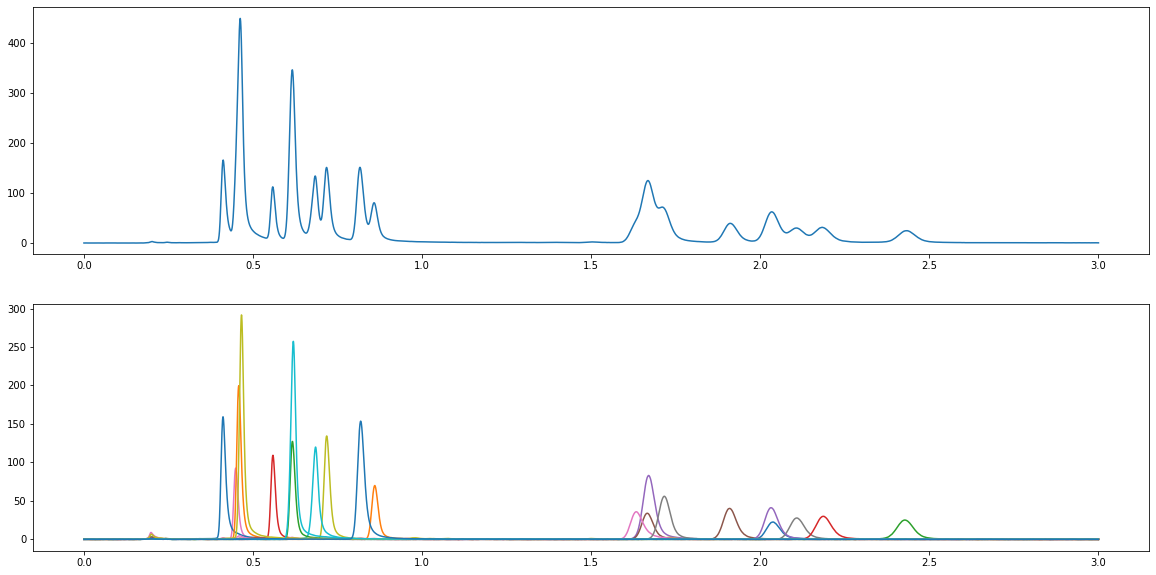

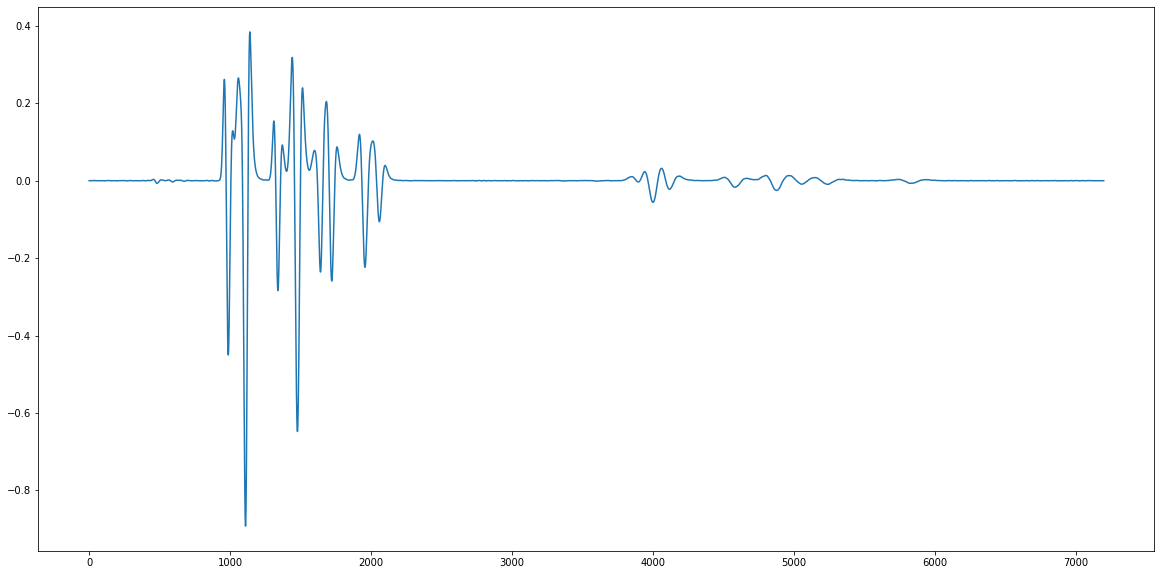

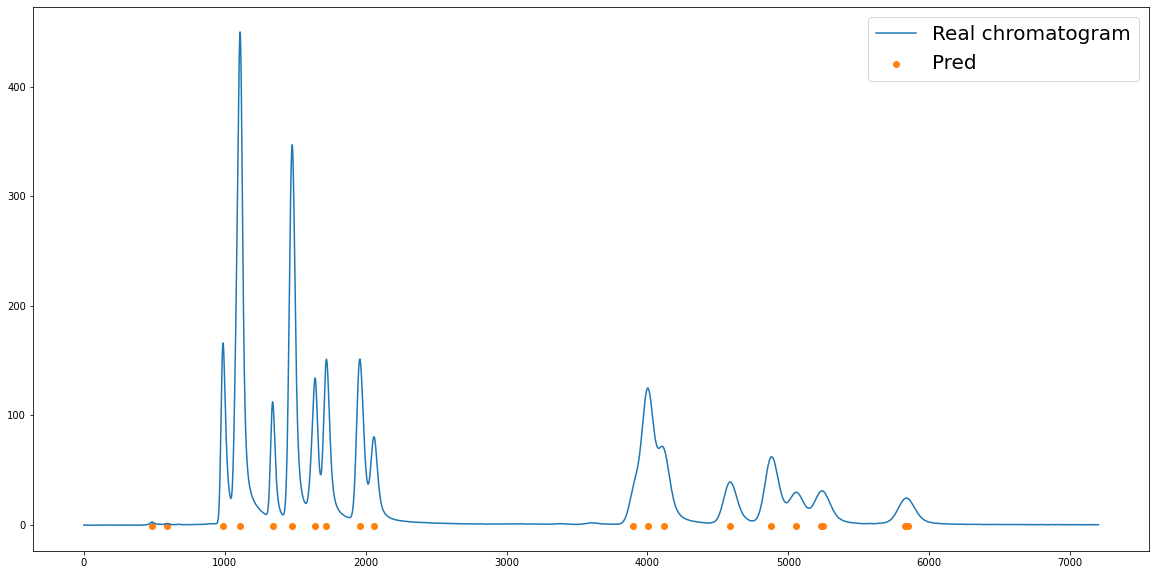

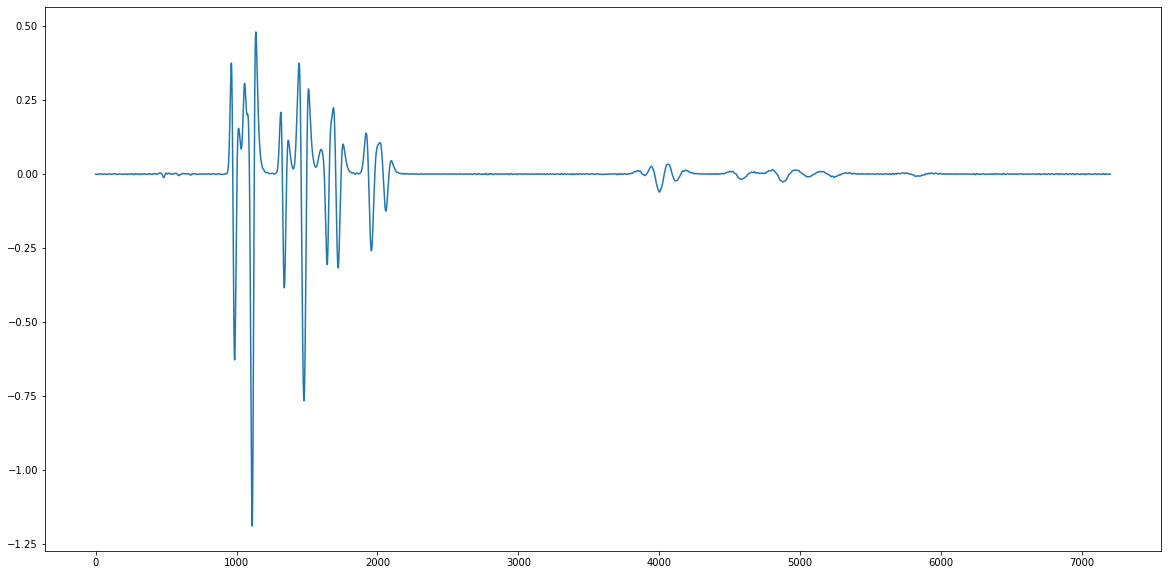

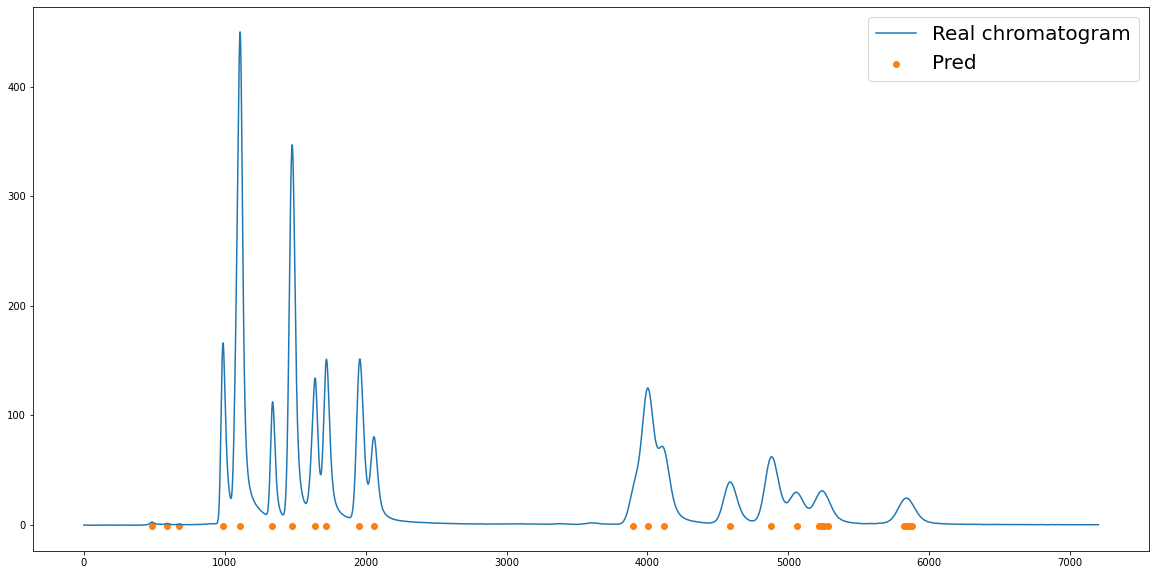

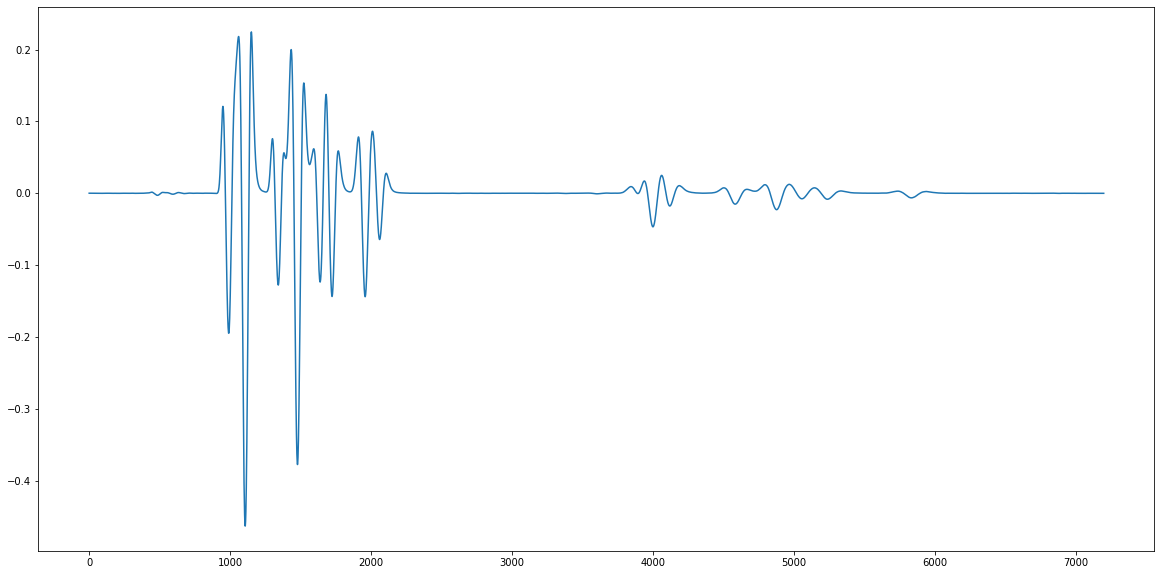

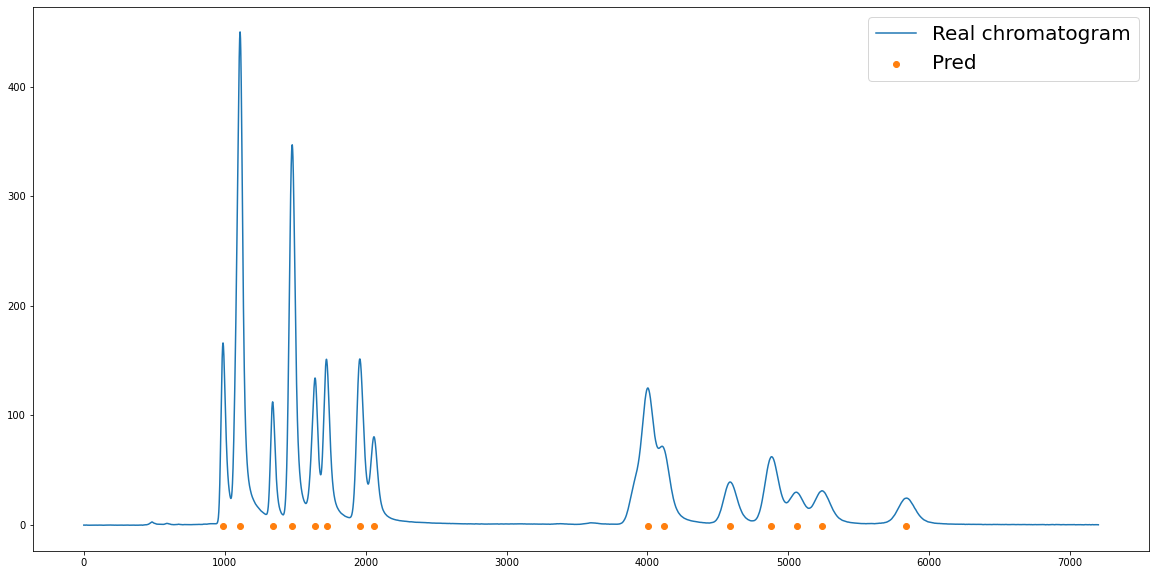

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# You will need to change back path name. I used absolute path and not relative path
output = read_chromatogram('../input/ISO10_mixed/MIX_ISO10.CSV', '[XVIL0-9]*.CSV')
x = output['chromatogram']['signal']
t = output['chromatogram']['time']


axes[0].plot(output['chromatogram']['time'], output['chromatogram']['signal'])

for peak in output['peaks']:
    axes[1].plot(peak['time'], peak['signal'])
    
# Perform peak detection here
## First with optimized settings ##
x_smooth, x_deriv = savgol_filter(x, window_length = 45, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.003)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

## small window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 27, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.003)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

## high window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 81, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.003)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

# Sequence of figures 
# 1 experimental chrom mixed
# 2 single peaks
# 3 2. derivative optimized 
# 4 identified peak optimized 
# 5 2. derivative small window 
# 6 identified peak small 
# 7 2. derivative large window 
# 8 identified peak large 

# 2. ISO 30 A

Number of identified peaks: 29
Number of identified peaks: 35
Number of identified peaks: 25


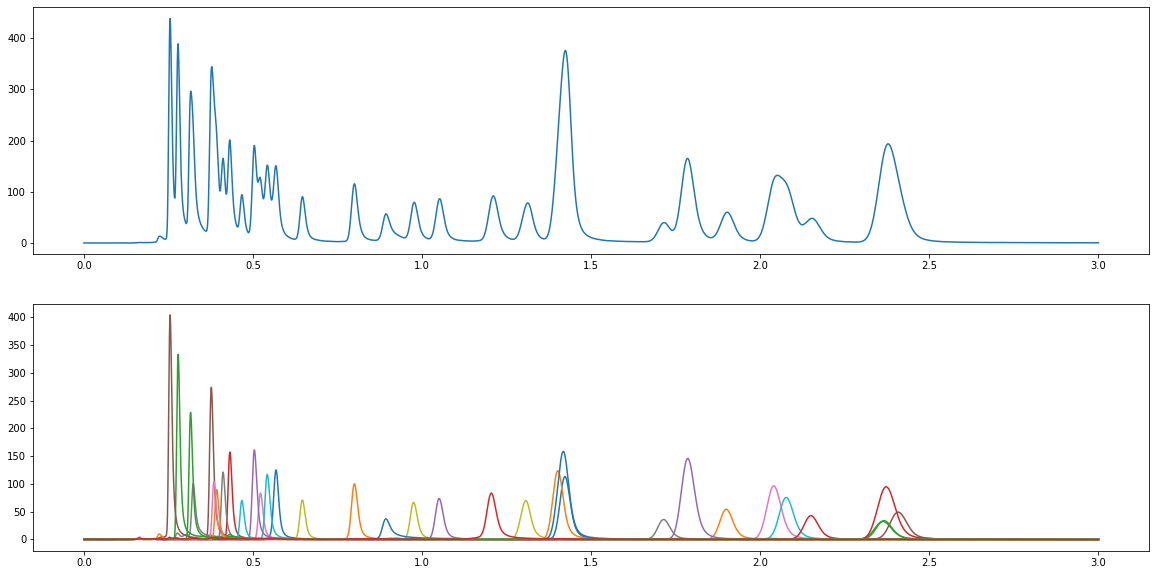

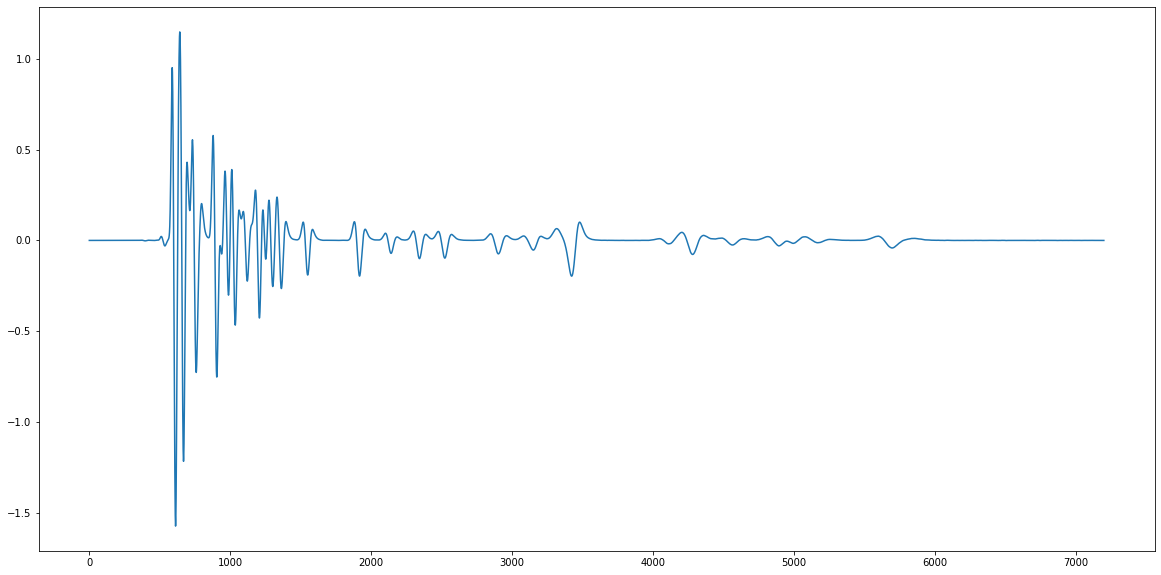

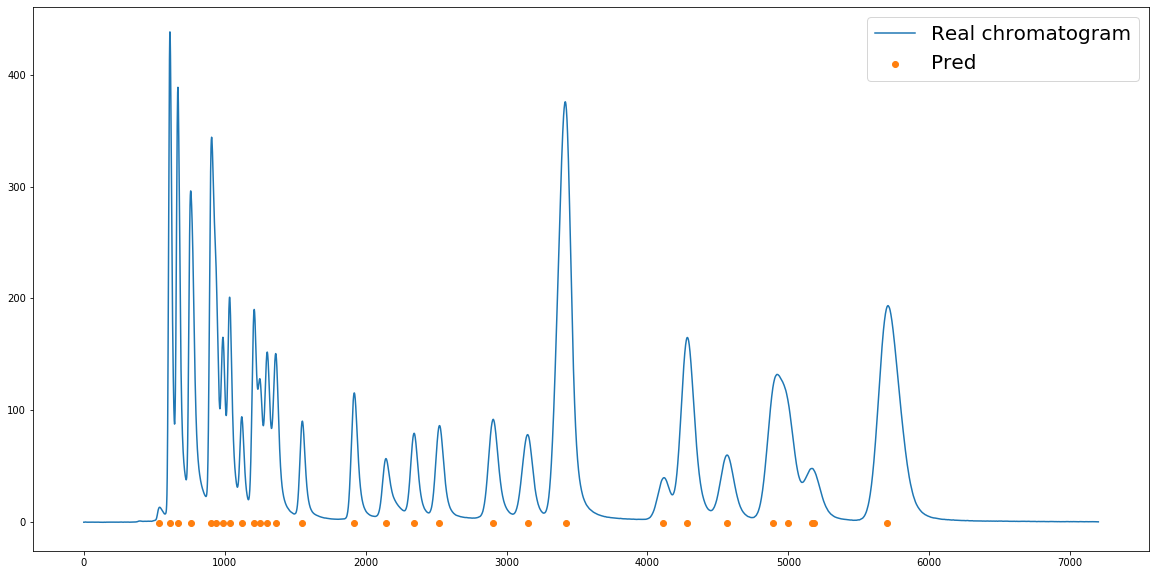

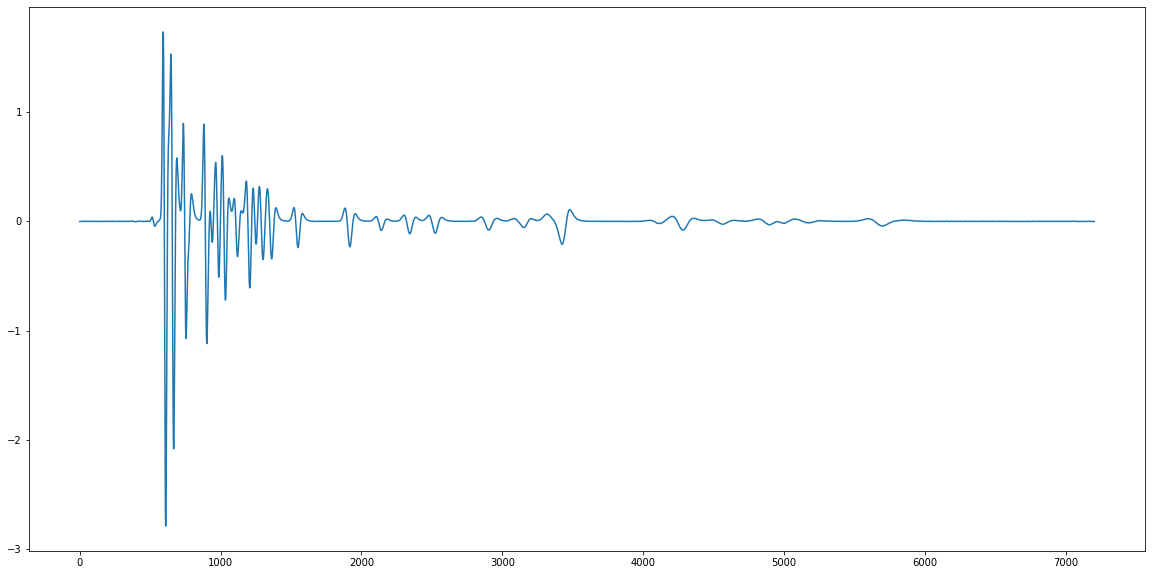

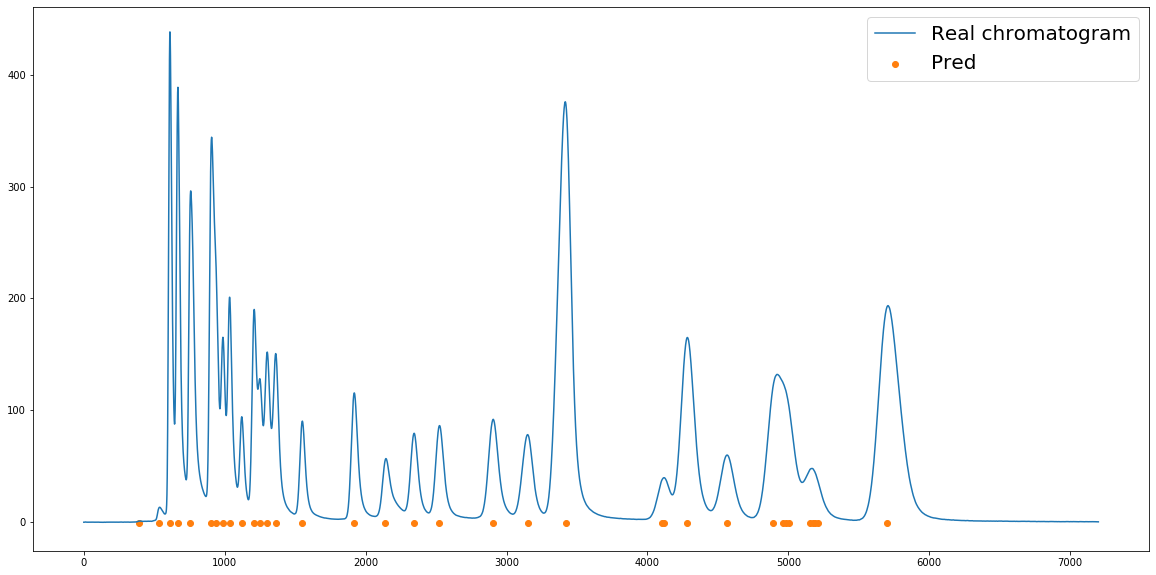

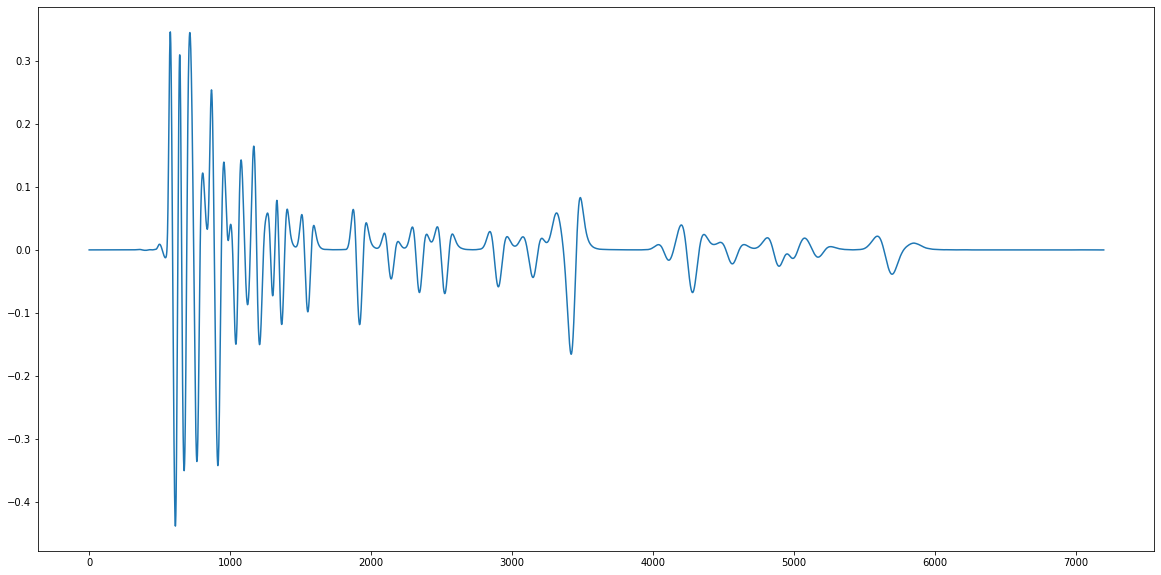

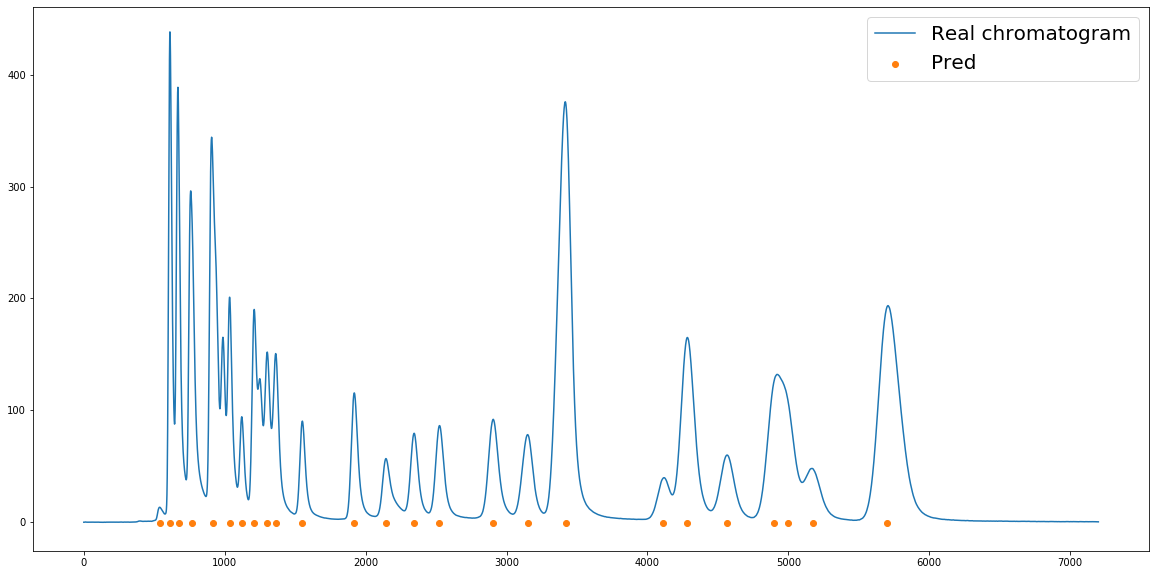

In [84]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

output = read_chromatogram('C:/Users/Utilisateur/Documents/PhD/deep-learning-peak-detection/ISO30A_mixed/MIX_ISO30A.CSV', '[XVIL0-9]*.CSV')
x = output['chromatogram']['signal']
t = output['chromatogram']['time']

axes[0].plot(output['chromatogram']['time'], output['chromatogram']['signal'])

for peak in output['peaks']:
    axes[1].plot(peak['time'], peak['signal'])

# optimized 
x_smooth, x_deriv = savgol_filter(x, window_length = 45, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.003)
print("Number of identified peaks: " + str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)
    
## small window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 27, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.003)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

## high window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 81, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.003)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

# Sequence of figures 
# 1 experimental chrom mixed
# 2 single peaks
# 3 2. derivative optimized 
# 4 identified peak optimized 
# 5 2. derivative small window 
# 6 identified peak small 
# 7 2. derivative large window 
# 8 identified peak large 

# 3. ISO 30B

Number of identified peaks: 29
Number of identified peaks: 33
Number of identified peaks: 25


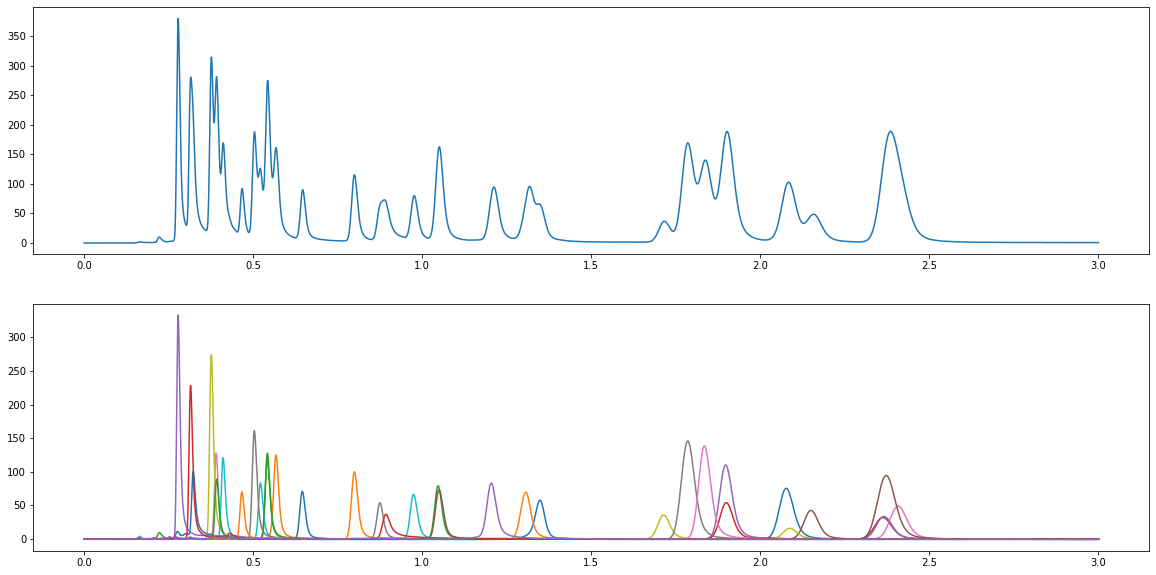

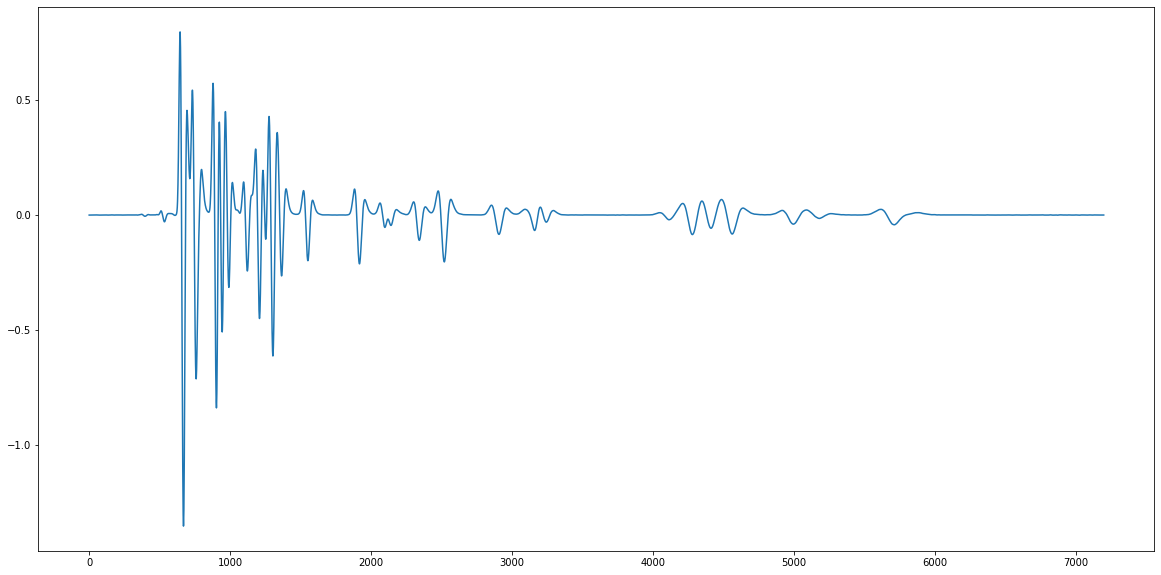

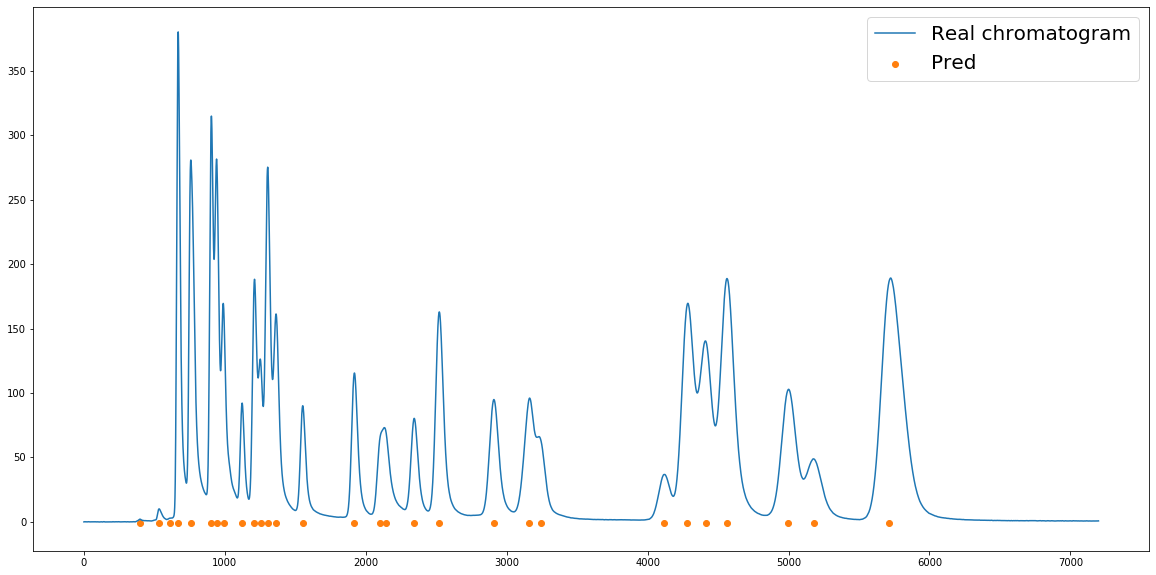

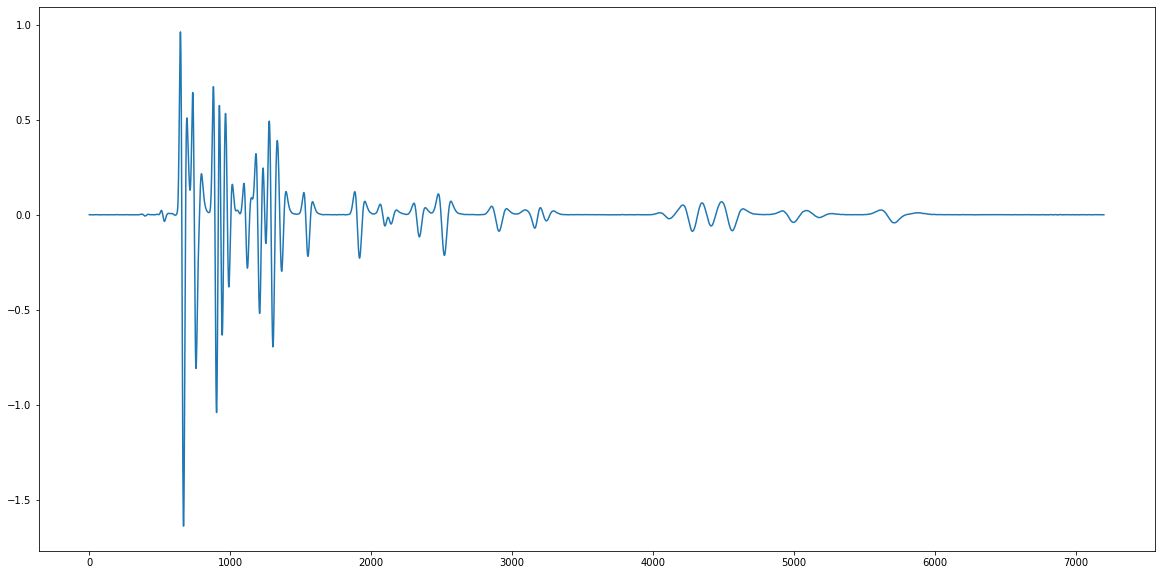

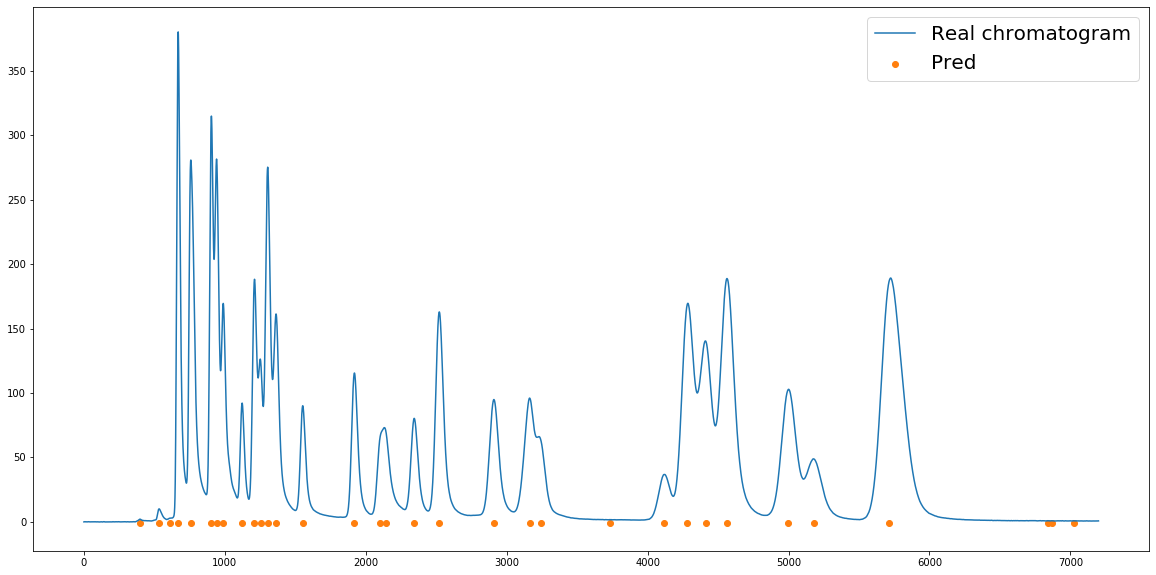

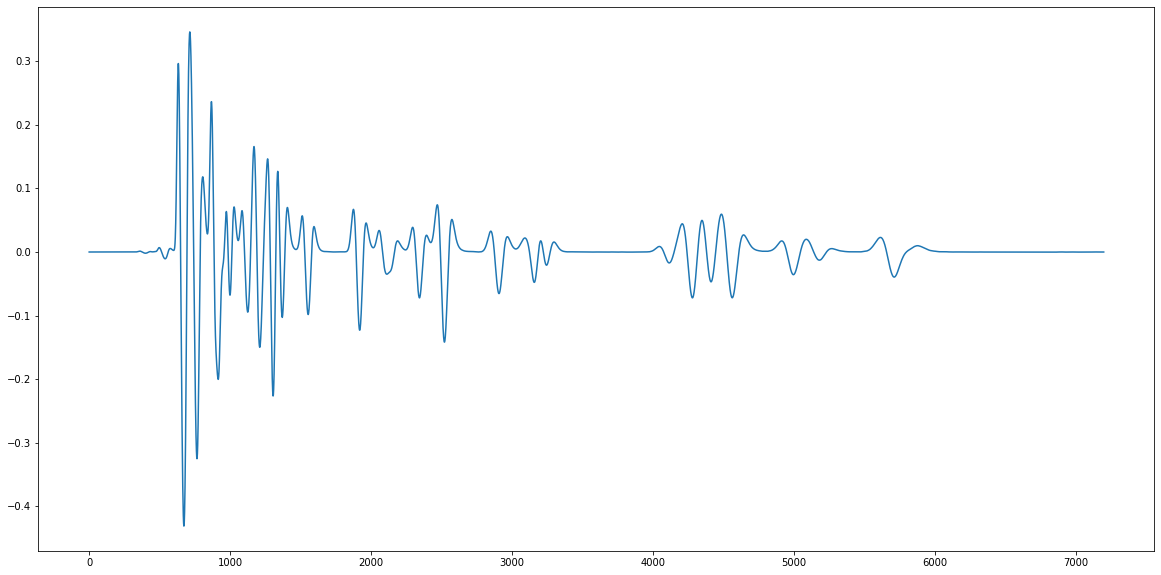

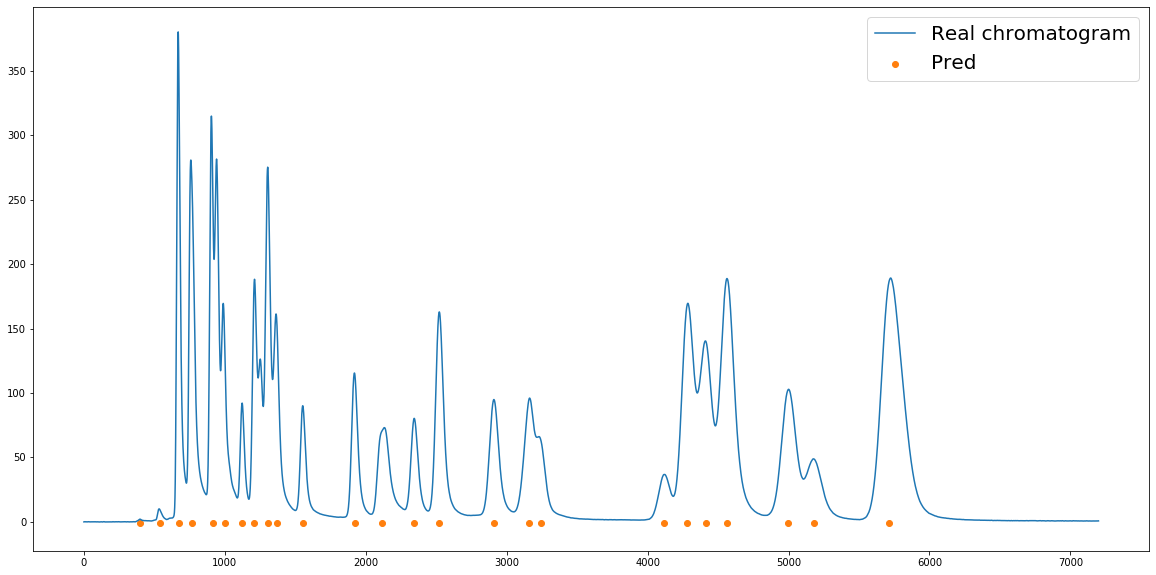

In [91]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

output = read_chromatogram('C:/Users/Utilisateur/Documents/PhD/deep-learning-peak-detection/ISO30B_mixed/MIX_ISO30B.CSV', '[XVIL0-9]*.CSV')
x = output['chromatogram']['signal']
t = output['chromatogram']['time']

axes[0].plot(output['chromatogram']['time'], output['chromatogram']['signal'])

for peak in output['peaks']:
    axes[1].plot(peak['time'], peak['signal'])
    
# Perform peak detection here
#optimized
x_smooth, x_deriv = savgol_filter(x, window_length = 45, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.0007)
print("Number of identified peaks: " + str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)
    
## small window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 39, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.0007)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

## high window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 81, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.0007)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

# Sequence of figures 
# 1 experimental chrom mixed
# 2 single peaks
# 3 2. derivative optimized 
# 4 identified peak optimized 
# 5 2. derivative small window 
# 6 identified peak small 
# 7 2. derivative large window 
# 8 identified peak large 

# 4. ISO 40

Number of identified peaks: 19
Number of identified peaks: 27
Number of identified peaks: 15


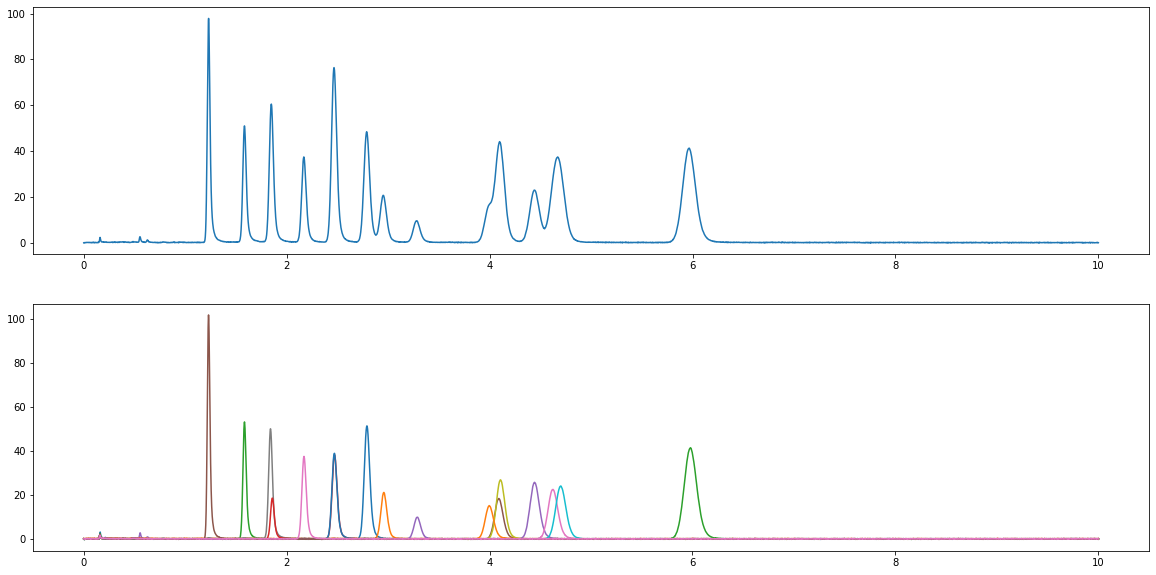

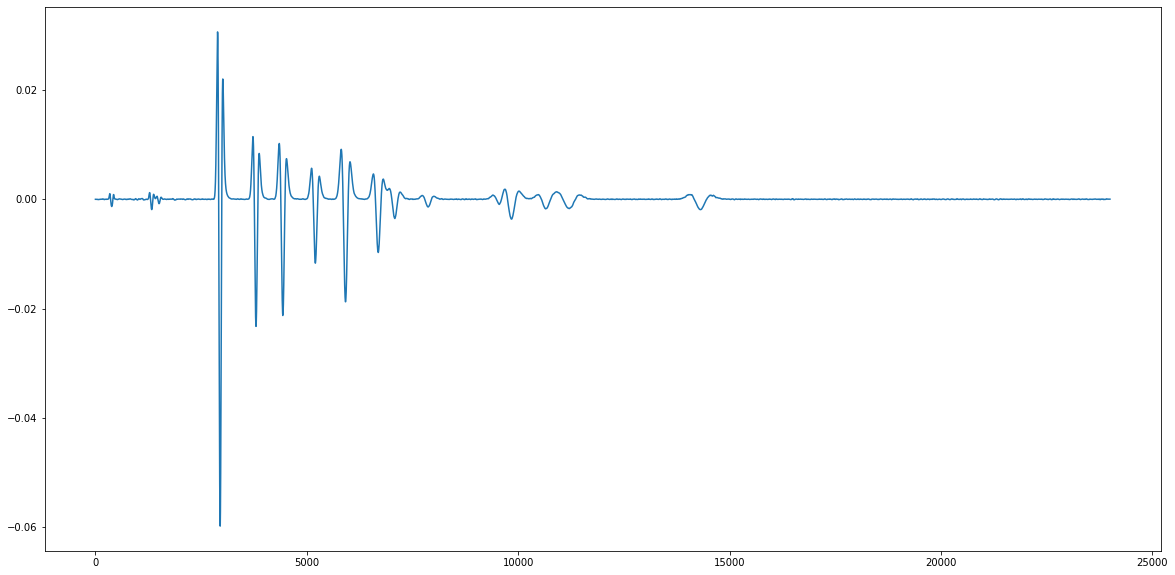

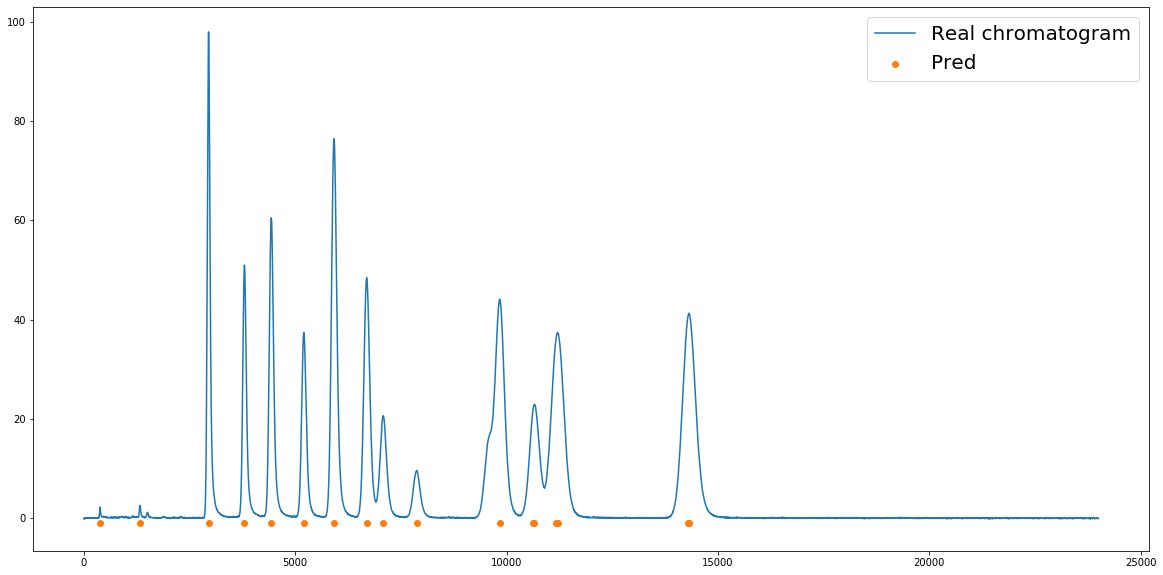

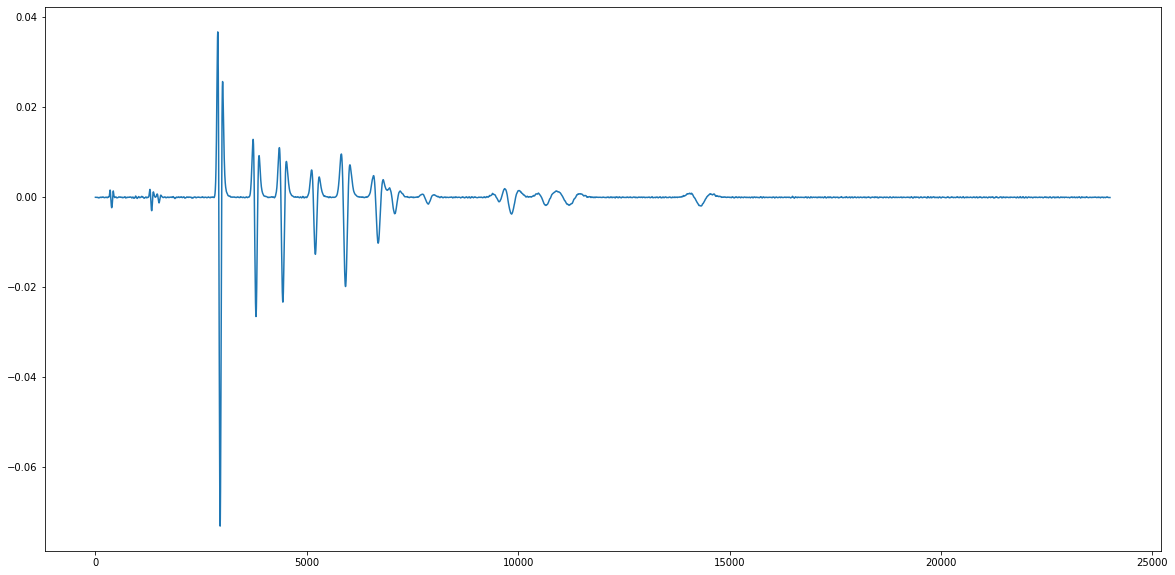

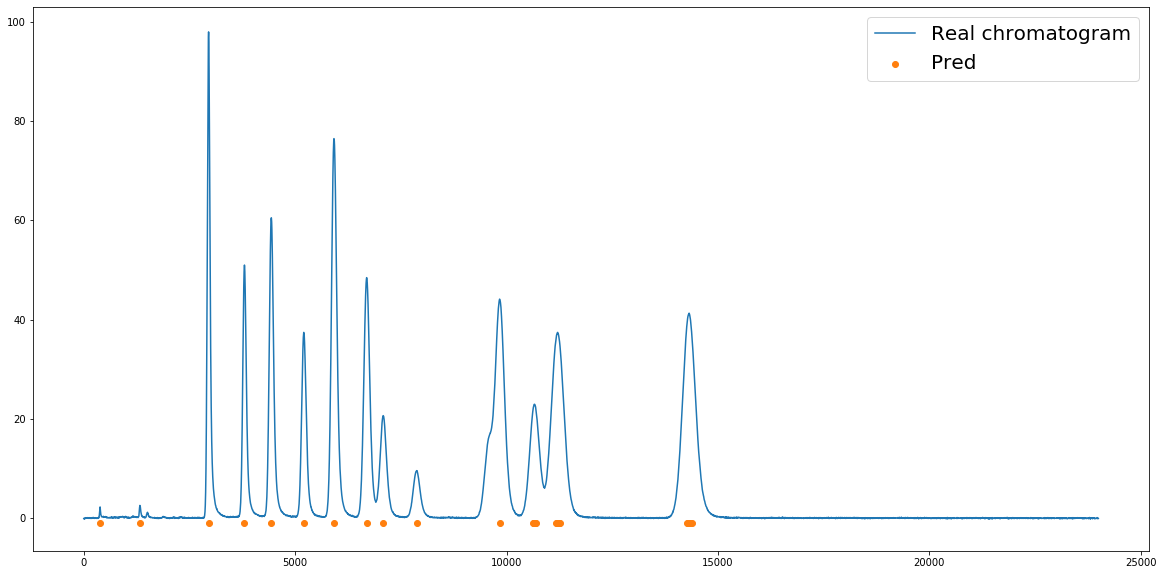

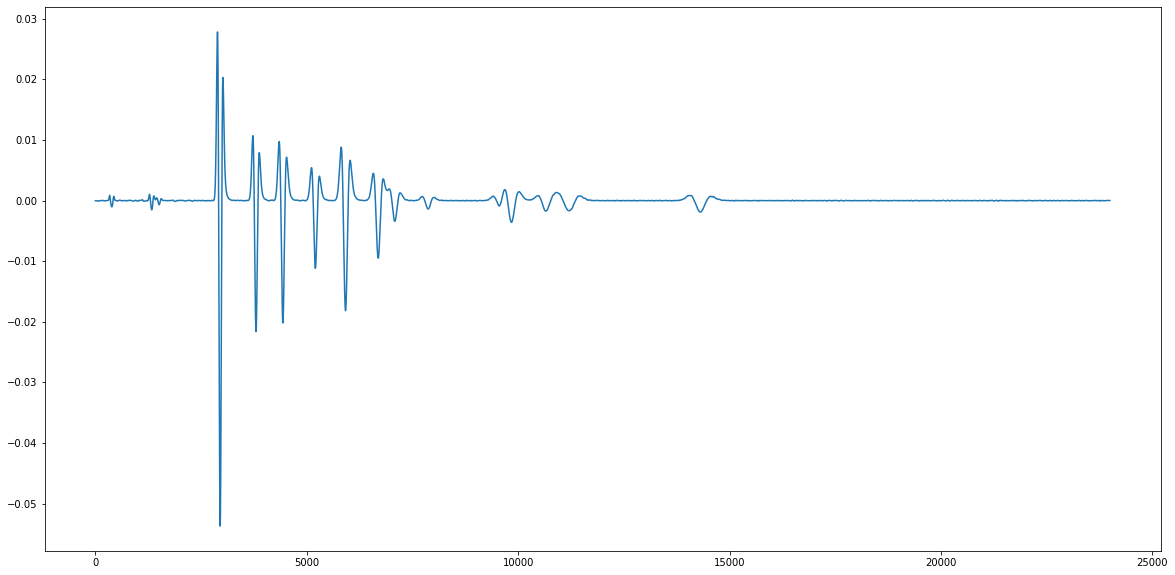

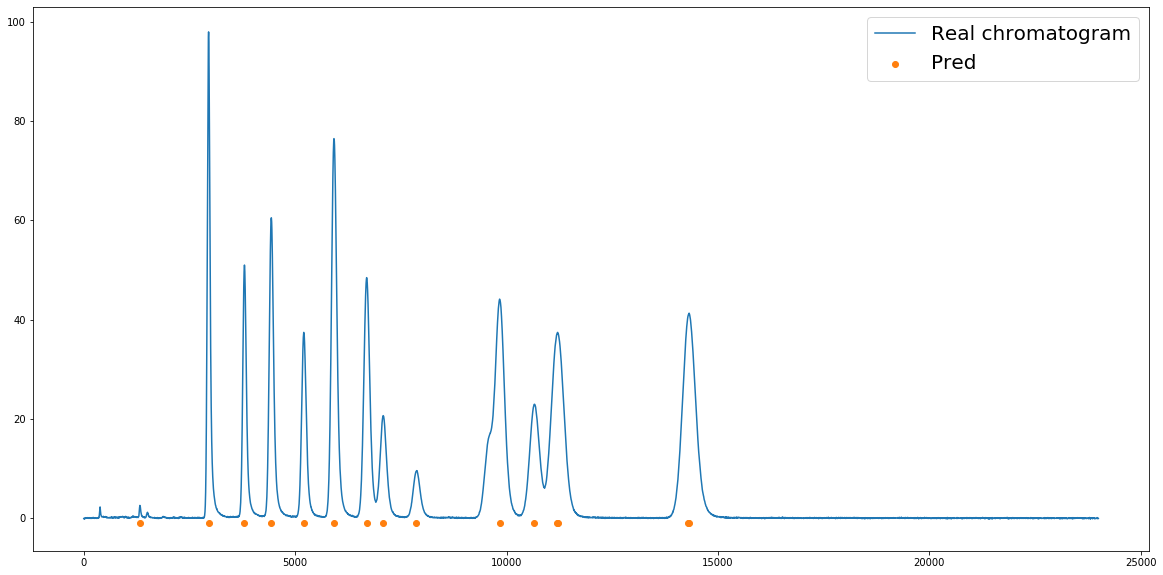

In [94]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

output = read_chromatogram('C:/Users/Utilisateur/Documents/PhD/deep-learning-peak-detection/ISO40_mixed/MIX_ISO40.CSV', '[XVIL0-9]*.CSV')
x = output['chromatogram']['signal']
t = output['chromatogram']['time']

axes[0].plot(output['chromatogram']['time'], output['chromatogram']['signal'])

for peak in output['peaks']:
    axes[1].plot(peak['time'], peak['signal'])
    
# Perform peak detection here
x_smooth, x_deriv = savgol_filter(x, window_length = 101, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.00125)
print("Number of identified peaks: " + str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)
    
## small window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 81, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.00125)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

## high window size ##
x_smooth, x_deriv = savgol_filter(x, window_length = 111, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.00125)
print("Number of identified peaks: "+ str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

# Sequence of figures 
# 1 experimental chrom mixed
# 2 single peaks
# 3 2. derivative optimized 
# 4 identified peak optimized 
# 5 2. derivative small window 
# 6 identified peak small 
# 7 2. derivative large window 
# 8 identified peak large 

# 5. Old (noisy)

Number of identified peaks: 17
Number of identified peaks: 33
Number of identified peaks: 16


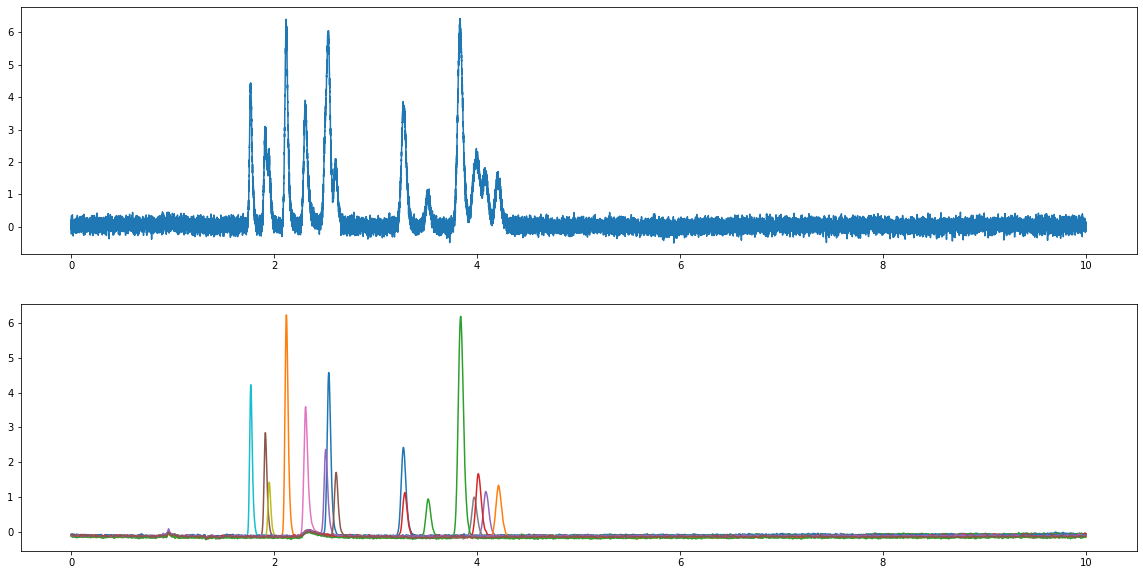

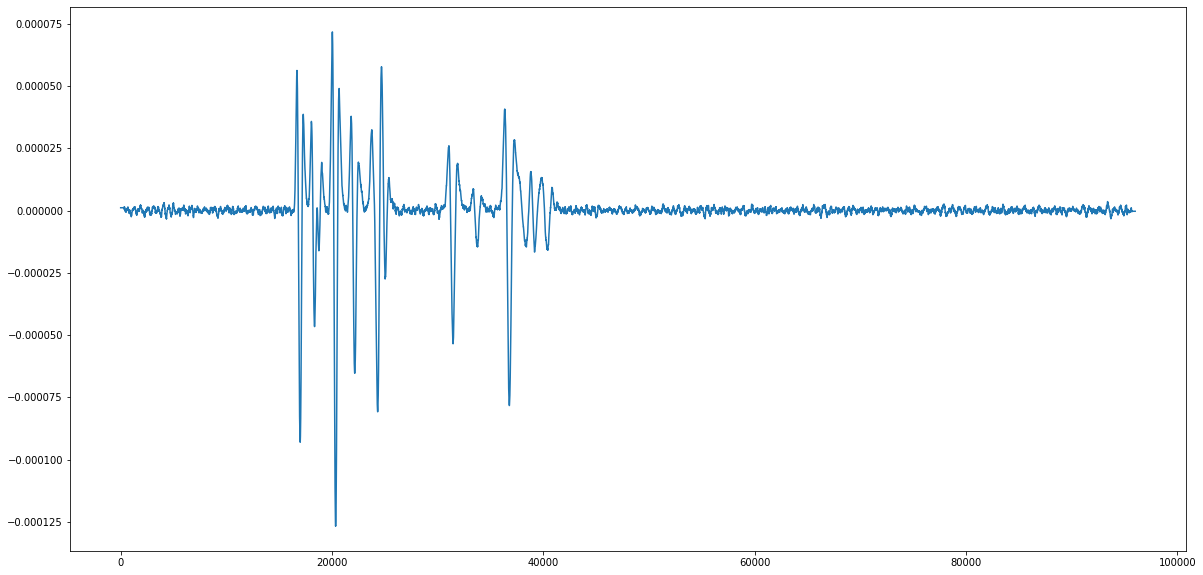

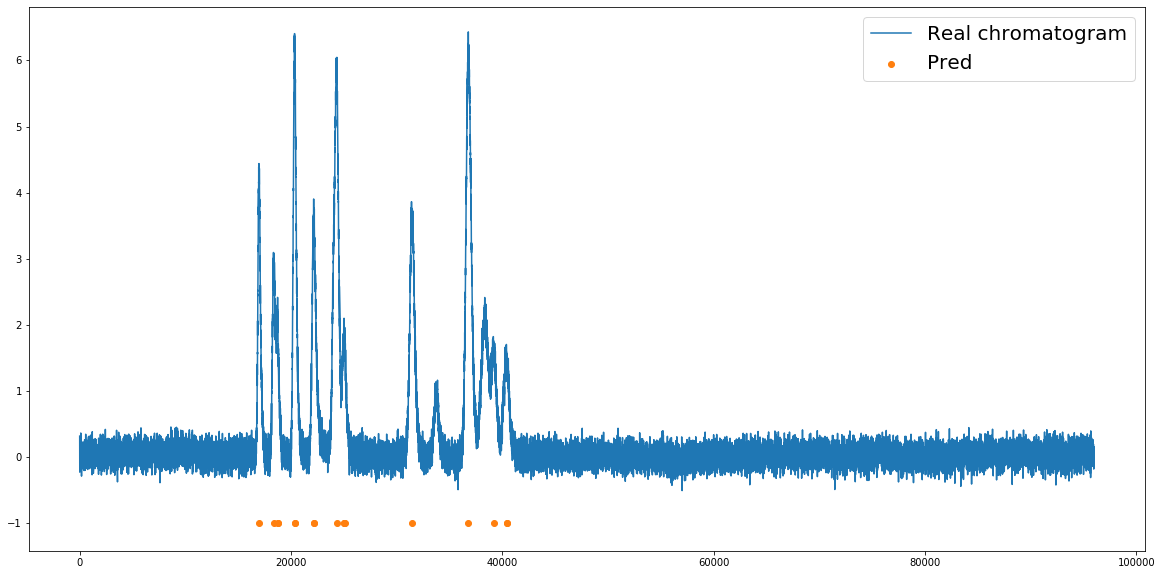

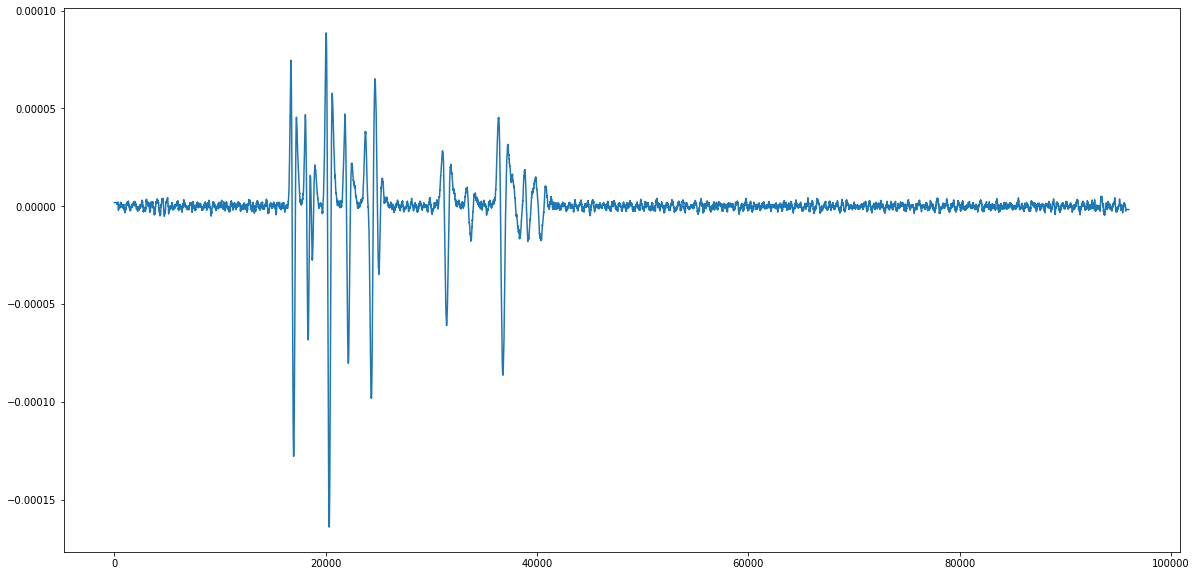

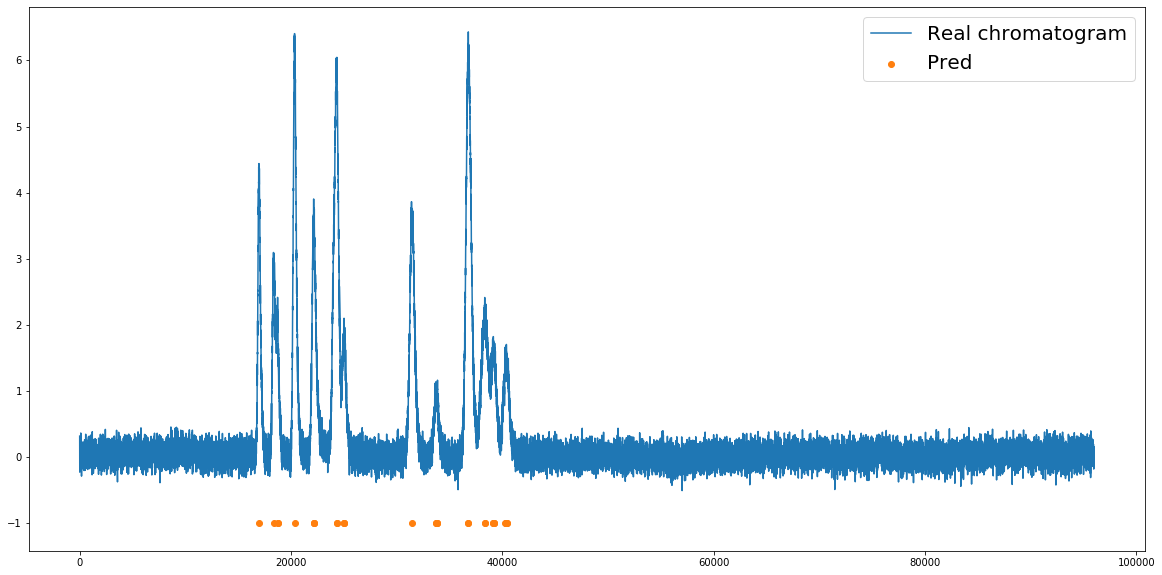

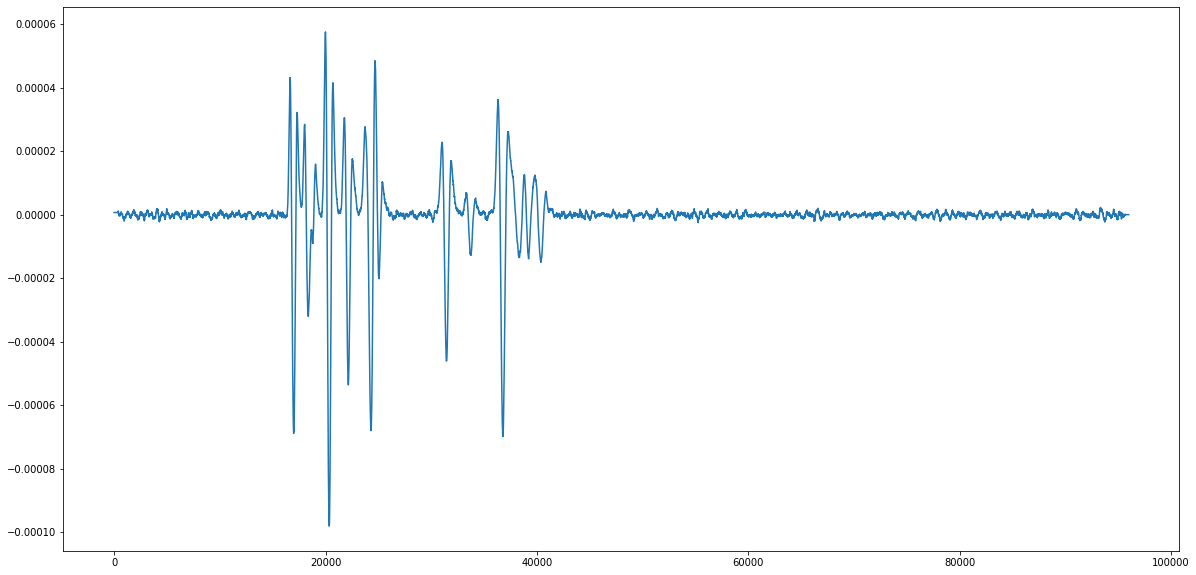

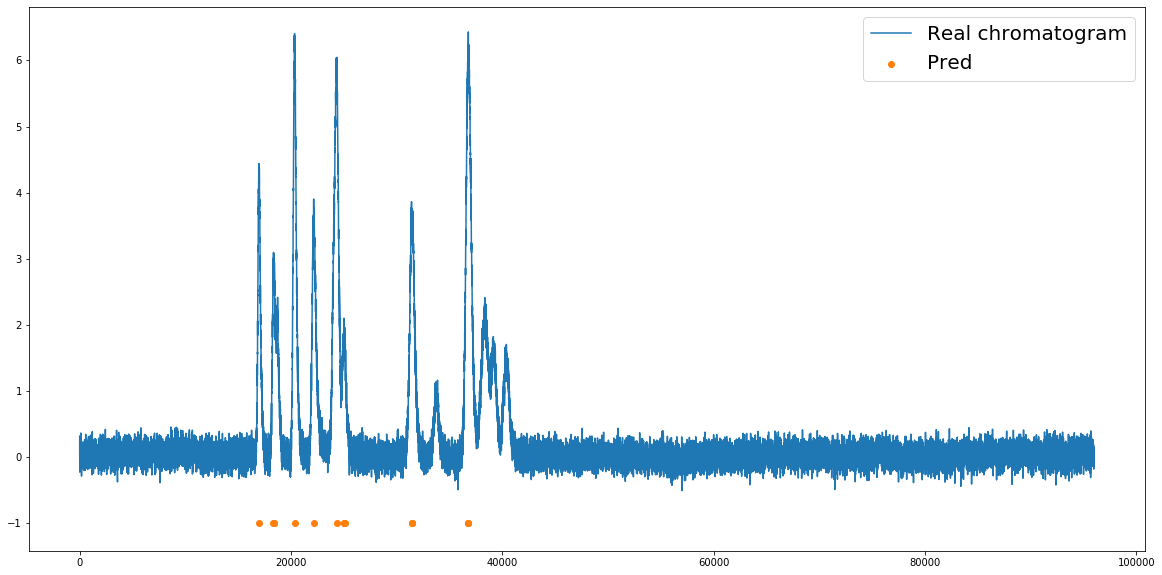

In [95]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

output = read_chromatogram('C:/Users/Utilisateur/Documents/PhD/deep-learning-peak-detection/chrom_1/ISO_ALL_F160.CSV', 'ISO_[0-9]*.CSV')
x = output['chromatogram']['signal']
t = output['chromatogram']['time']

axes[0].plot(output['chromatogram']['time'], output['chromatogram']['signal'])

for peak in output['peaks']:
    axes[1].plot(peak['time'], peak['signal'])
    
    
# Perform peak detection here
#Optimized
#Notice how large window size is compared to other chromatograms 
x_smooth, x_deriv = savgol_filter(x, window_length = 601, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.00001575)
print("Number of identified peaks: " + str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

#small window
x_smooth, x_deriv = savgol_filter(x, window_length = 501, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.00001575)
print("Number of identified peaks: " + str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

#large window
x_smooth, x_deriv = savgol_filter(x, window_length = 701, deriv = 2, polyorder = 2)
#output = find_peaks(x_deriv, height=0.0001, width=[16, None])
loc = local_min(x_deriv,0.00001575)
print("Number of identified peaks: " + str(len(loc)))

plt.figure(figsize=(20,10))
plt.plot(x_deriv)

plt.figure(figsize=(20, 10))
plt.plot(x, label='Real chromatogram')
plt.scatter(loc, [-1] * len(loc), c='C1', label='Pred')
plt.legend(fontsize=20)

# Sequence of figures 
# 1 experimental chrom mixed
# 2 single peaks
# 3 2. derivative optimized 
# 4 identified peak optimized 
# 5 2. derivative small window 
# 6 identified peak small 
# 7 2. derivative large window 
# 8 identified peak large 